In [2]:
# standard imports
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

from pandas import Series,DataFrame

# normal distribution
from scipy.stats import norm

# optimization and regression imports
from scipy.optimize import minimize
from scipy import stats

# data imports
import pandas_datareader as web

In [3]:
tips = sns.load_dataset('tips') # built in seaborn dataset
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


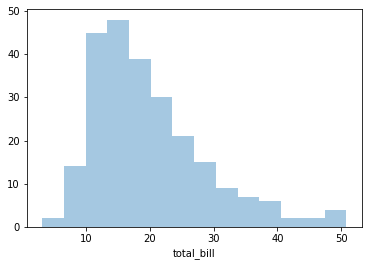

In [5]:
# histogram
sns.distplot(tips['total_bill'], kde=False)

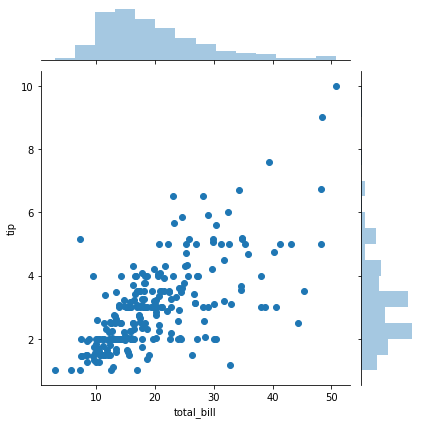

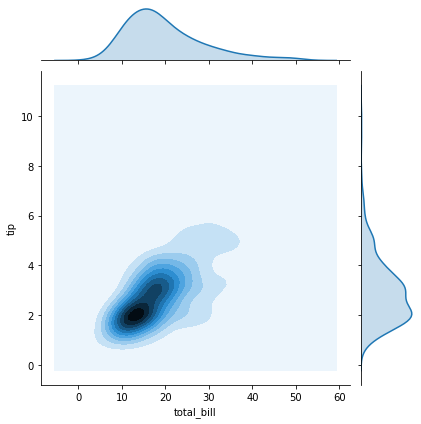

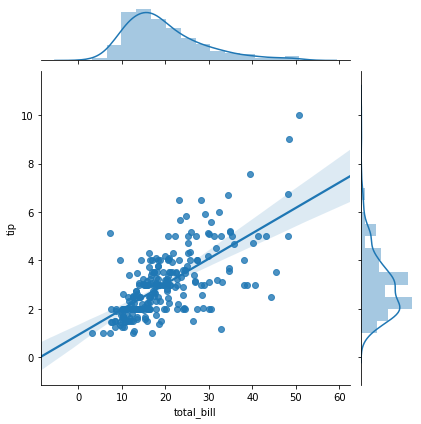

In [6]:
# joint plot for numerical columns - 3 arguments: x, y, data
sns.jointplot(x='total_bill',y='tip',data=tips, kind='scatter')
sns.jointplot(x='total_bill',y='tip',data=tips, kind='kde')
sns.jointplot(x='total_bill',y='tip',data=tips, kind='reg')

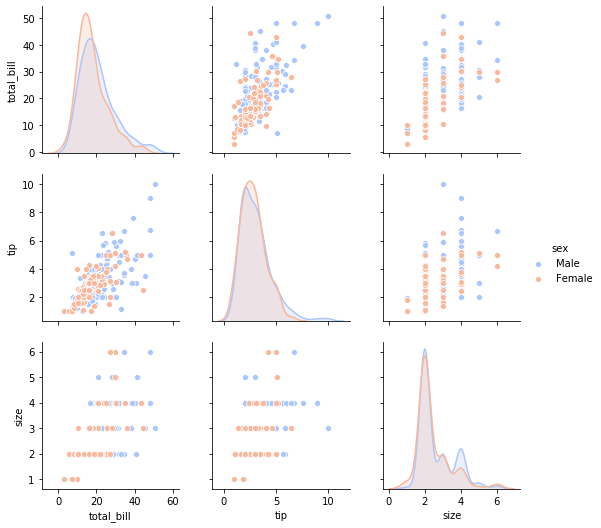

In [7]:
# nice way to quickly visualize your data, takes a long time if dataset is large
# sns.pairplot(tips)
sns.pairplot(tips,hue='sex', palette='coolwarm')

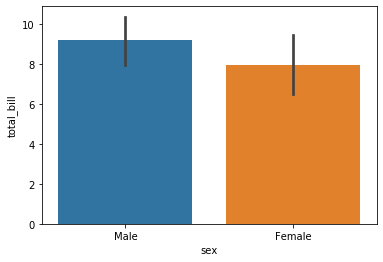

In [9]:
# categorical plots
# visualization of a groupby action
# x is categorical, y is numerical
"""
sns.barplot(x='sex',y='total_bill', data=tips)
sns.countplot(x='sex',data=tips) # yaxis is chosen for you - it is a count
"""
sns.barplot(x='sex',y='total_bill', data=tips,estimator=np.std) # np.mean np.median works too





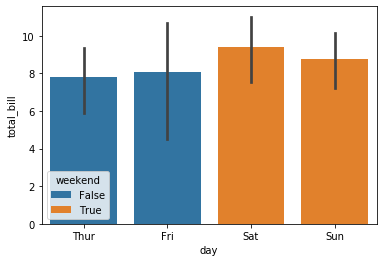

In [10]:
# create your own category based on certain labels
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.barplot(x="day", y="total_bill", hue="weekend", data=tips, dodge=False, estimator=np.std)

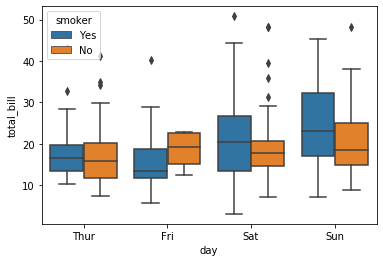

In [11]:
# box plots with hue (another dimension)
#sns.boxplot(x='day',y='total_bill',data=tips)
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker') # hue indicator adds another layer

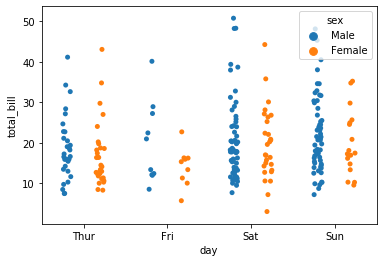

In [12]:
# violin plots not as useful
#sns.violinplot(x='day',y='total_bill',data=tips, hue='sex', split=True)
sns.stripplot(x='day',y='total_bill', data=tips, jitter=True, hue='sex', dodge=True) # dodge means split

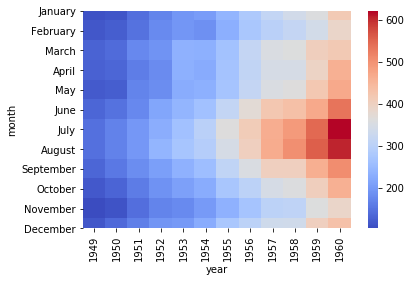

In [16]:
# matrix plots
flights = sns.load_dataset('flights') # another built in dataset
fp = flights.pivot_table(index='month',columns='year',values='passengers') # index is months, then columns are year, values in middle
sns.heatmap(fp, cmap='coolwarm') # which month and which year are popular # cmap='magma', linecolor='white', linewidths=3

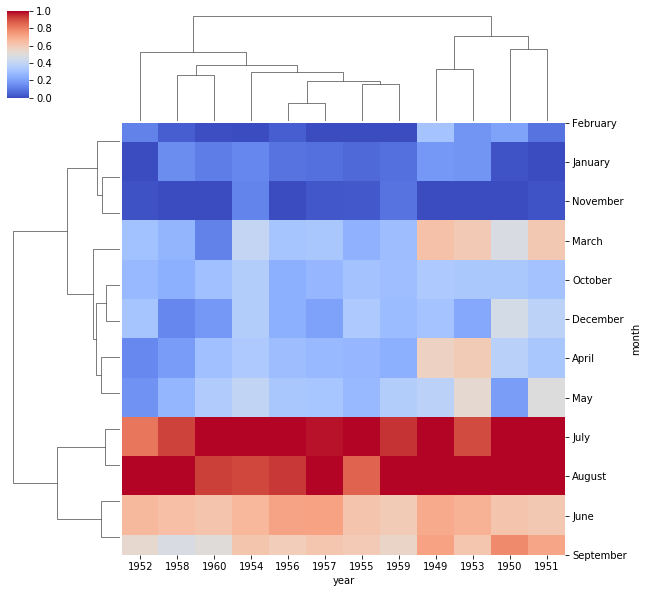

In [20]:
# cluster most similar months together
# mathematical clustering algos running in the background
#sns.clustermap(fp, cmap='coolwarm')
sns.clustermap(fp, cmap='coolwarm', standard_scale=1)   # 1959 and 1960 are similar, and June/July are similar

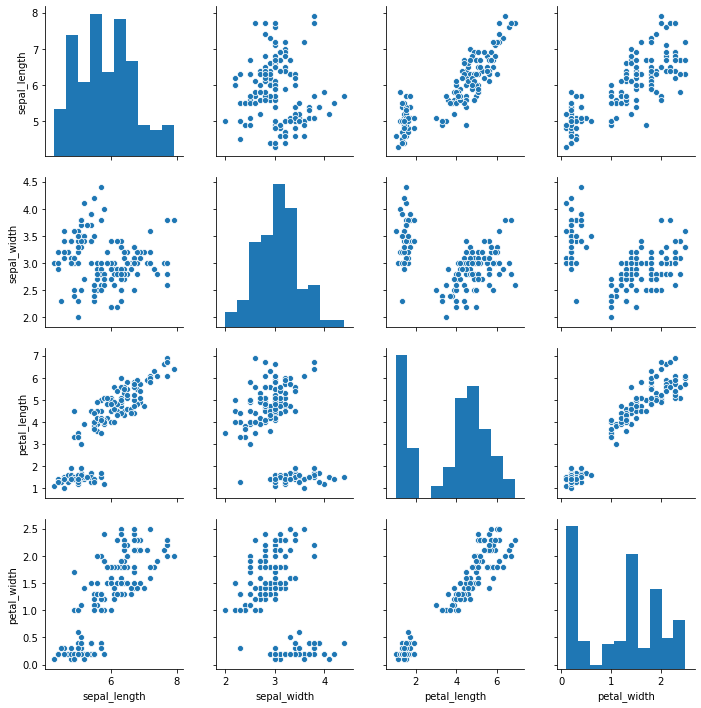

In [21]:
# grids
import seaborn as sns
%matplotlib inline
iris = sns.load_dataset('iris')
sns.pairplot(iris)

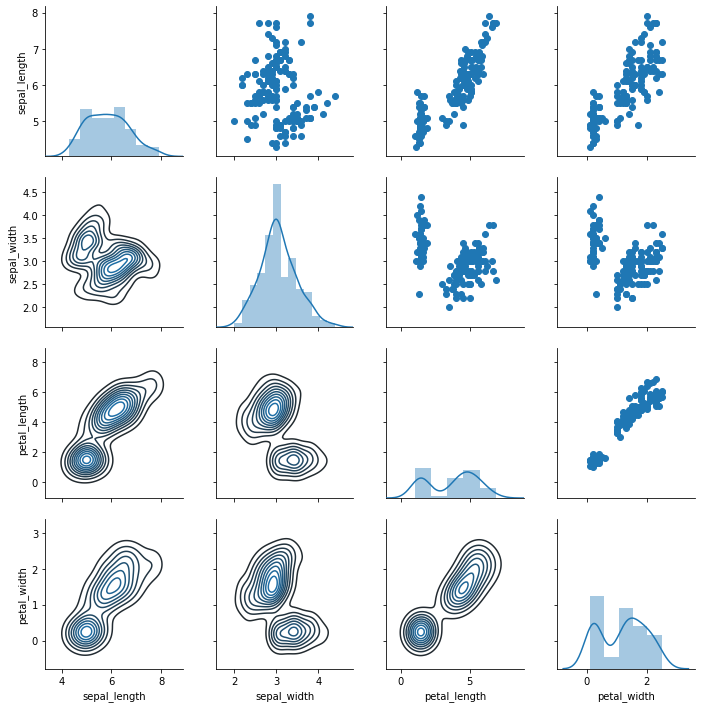

In [24]:
grid = sns.PairGrid(iris)
grid.map_diag(sns.distplot)
grid.map_upper(plt.scatter)
grid.map_lower(sns.kdeplot)

In [25]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


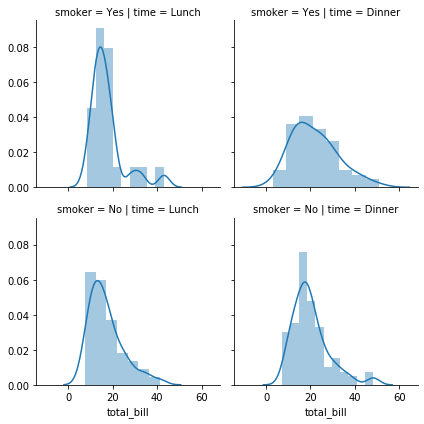

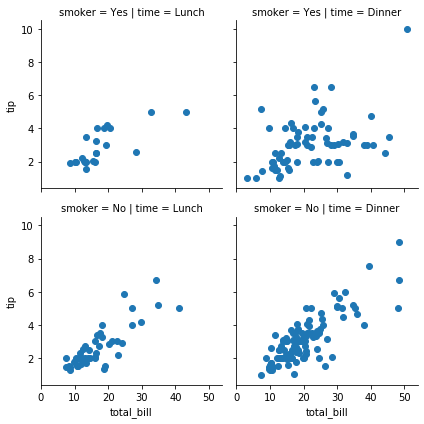

In [30]:
# Facet grid (fast groupby)
# pass in the data using data= and it will be in the distribution (total_bill)
# the column=time (left column Lunch, right column dinner) 
# the rows=smoker (row 1 = Yes, row 2 = No)
grid = sns.FacetGrid(data=tips,col='time', row='smoker') 
grid.map(sns.distplot,'total_bill') # one argument 
grid2 = sns.FacetGrid(data=tips,col='time', row='smoker')
grid2.map(plt.scatter,'total_bill','tip') # more than one argument

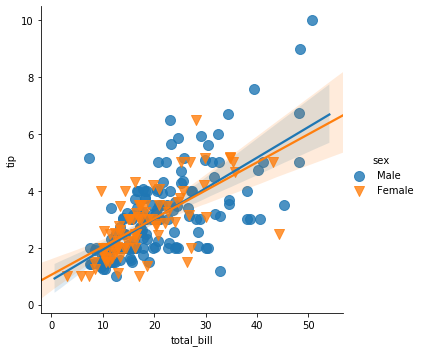

In [35]:
# regression plot
# linear model plot (lm)
sns.lmplot(x='total_bill', y='tip', data=tips,
          hue='sex',
          markers=['o','v'], scatter_kws={'s':100})

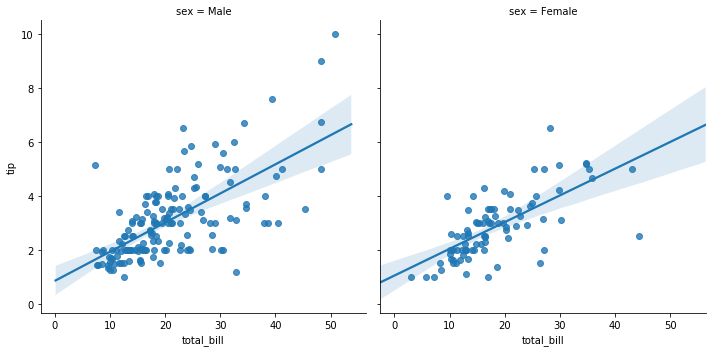

In [44]:
sns.lmplot(x='total_bill', y='tip', data=tips,
          col='sex' # ,aspect=0.6, height=4
)

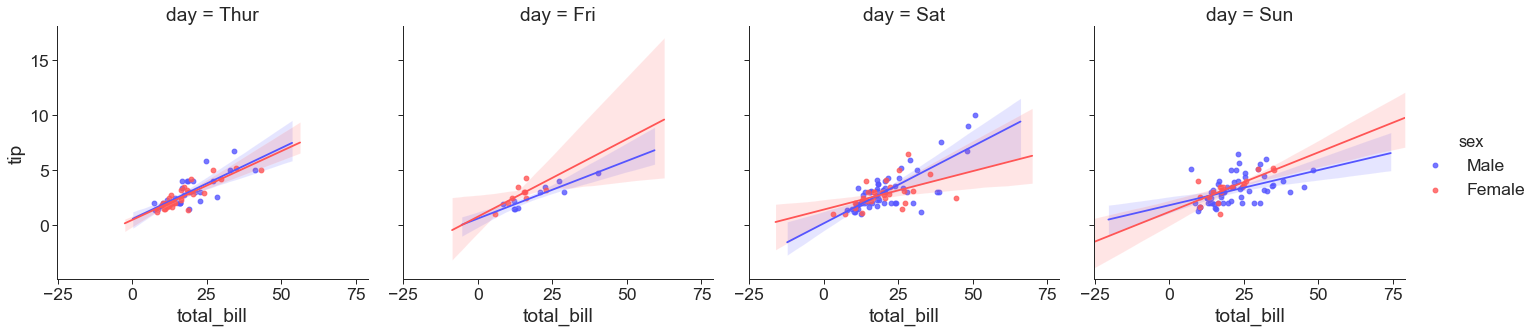

In [58]:
sns.lmplot(x='total_bill', y='tip', data=tips,
          col='day', hue='sex' # , row='time'
           , palette='seismic' 
)

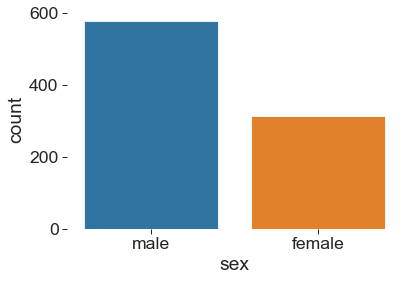

In [60]:
# Two ways to set size
# plt.figure(figsize=(12,5))
sns.set_context(context='paper', font_scale=2) # paper, notebook, talk, poster
sns.set_style('ticks') # darkgrid whitegrid ticks 
sns.countplot(x='sex',data=tips)
sns.despine(left=True, bottom=True)

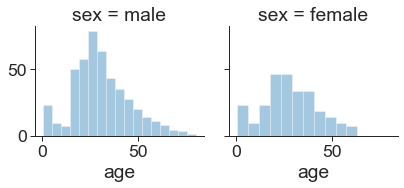

In [64]:
titanic = tips = sns.load_dataset('titanic')
g = sns.FacetGrid(data=titanic, col='sex')
g.map(sns.distplot,'age', kde=False)